# Image Processing and Feature Extraction


## Topics includes:

* 1. Data Load and Plot
* 2. Image Equalization
* 3. Filtering Methods: Gaussian Filter & Average Filter
* 4. Feature Extraction Methods: Sobel Edge Detection & Canny Edge Detection




#### Use different libraries to load image

#### 1. Matplotlib Lib

<class 'numpy.ndarray'>
(252, 408, 3)


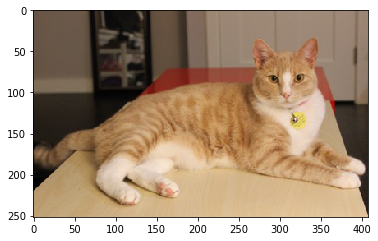

In [20]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img1 = mpimg.imread('cat.jpg')
plt.imshow(img1)
print(type(img1))
print(img1.shape)

#### 2. CV2 Lib 

numpy.ndarray

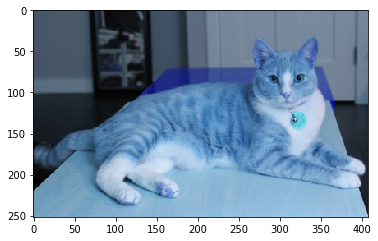

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv2.imread('cat.jpg')
plt.imshow(img2)
type(img2)

Note that the color is not right, because when using cv2 to load image, the color channels are BGR not RGB. Hence, we need to change it to the right order.

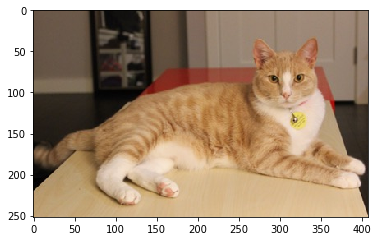

In [22]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

#### 3. PIL Lib

PIL.JpegImagePlugin.JpegImageFile

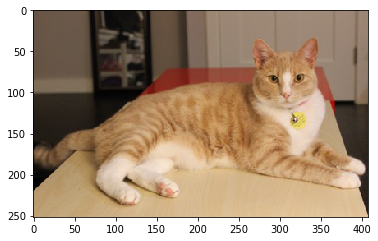

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('cat.jpg')
plt.imshow(img3)
type(img3)

Note that this time the image type is not numpy.array, thus we need to do transformation.

In [24]:
import numpy as np

img3 = np.array(img3)
img3.shape

(252, 408, 3)

Use np to save images.

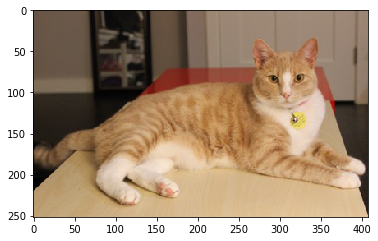

In [25]:
import numpy as np

# Save the image
np.save('cat.npy', img3)

#Load the image
img3 = np.load('cat.npy')

plt.imshow(img3)

## Image Scaling to Particular Size


Original size: 408 x 252
New size: 200 x 200


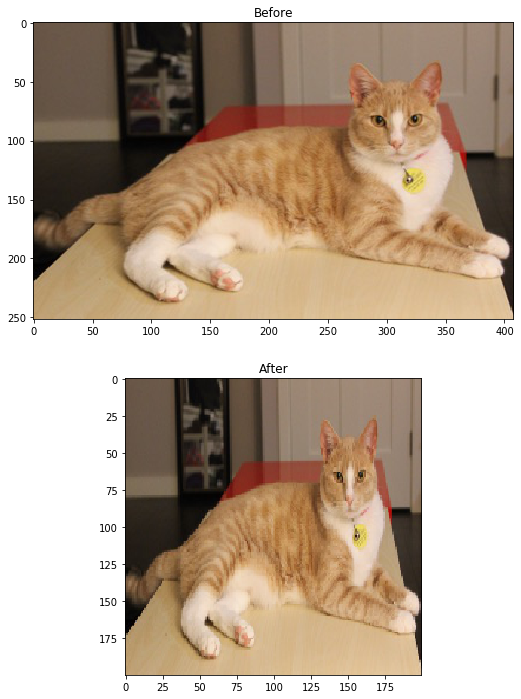

In [26]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

orig_img = Image.fromarray(img3)

# Original shape
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# Target: 200 * 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Plot
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


Note: image scaling caused image distortion. We can scale the image according to the original image aspect ratio to avoid distortion

Original size: 408 x 252
Scaled size: 200 x 123
New size: 408 x 252


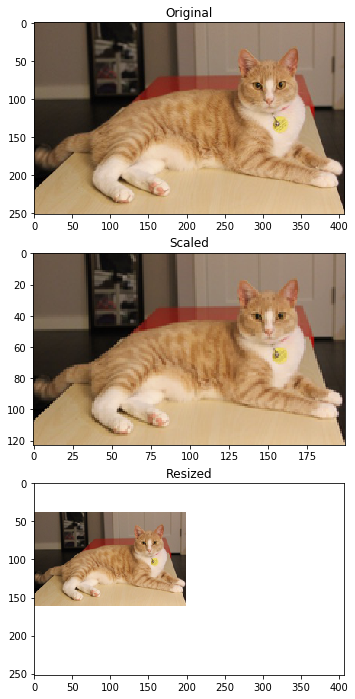

In [27]:
from PIL import Image, ImageOps

orig_img = Image.open('cat.jpg')

# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# thumbnail method
scaled_img = orig_img.copy()
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)


# Use the white background
new_img = Image.new("RGB", (orig_height, orig_width), (255, 255, 255))

# Put the image on the white background
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Viewing numerical characteristics of an image

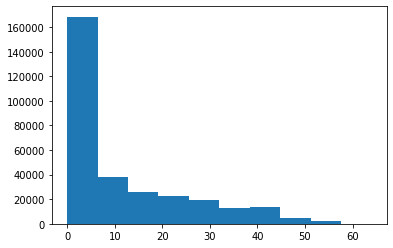

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('cat.darkened.jpeg')
img3 = np.array(img3)
import matplotlib.pyplot as plt
%matplotlib inline

# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(img3.ravel())
plt.show()

Note: we can see whether the distribution of the values of the image is evenly distributed through the histogram

We perform equalization of the graph in order to enhance contrast and increase the clarity.

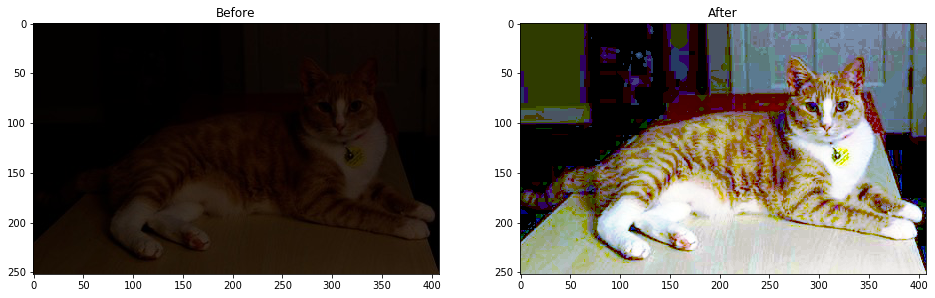

In [30]:
from PIL import Image, ImageOps
%matplotlib inline

# Equalize the image - but we need to convert the numpy array back to the PIL image format
img3PIL_eq = ImageOps.equalize(Image.fromarray(img3))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img3)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(img3PIL_eq)
a.set_title('After')

plt.show()

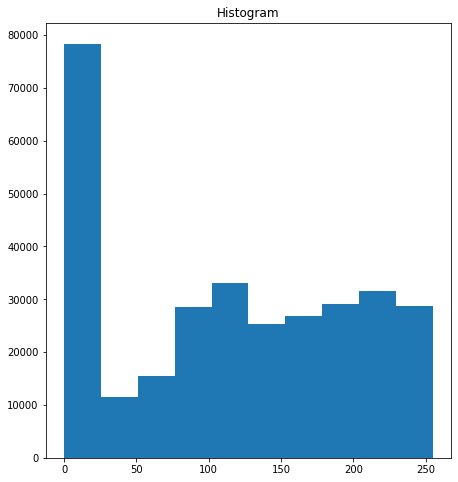

In [32]:
# Display histograms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
%matplotlib inline

img3_eq = np.array(img3PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img3_eq.ravel())
a.set_title('Histogram')

plt.show()

Now we can take a look at the distribution after equalization.It's clear that the numerical distribution has become more evenly distributed.

## Filtering the noise


### Firstly, we manually add random noise

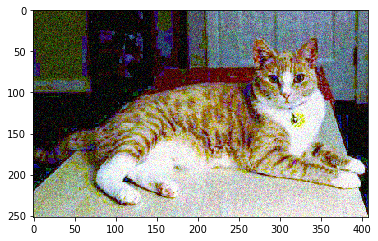

In [33]:
import skimage
%matplotlib inline

img3_n = skimage.util.random_noise(img3_eq)
plt.imshow(img3_n)

### Perform Gaussian Filtering

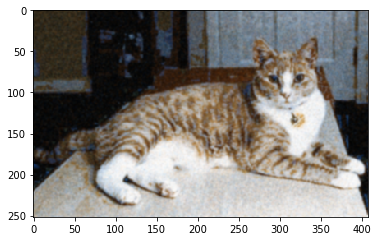

In [34]:
from scipy.ndimage.filters import gaussian_filter as gauss
%matplotlib inline

img3_gauss = gauss(img3_n, sigma=1)   
plt.imshow(img3_gauss)

### Perform Average Filtering

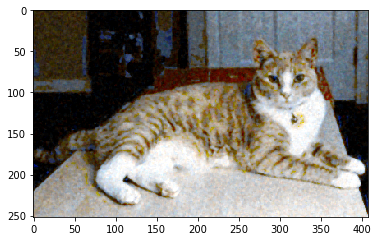

In [35]:
from scipy.ndimage.filters import median_filter as med
%matplotlib inline

img3_med = med(img3_n, size=3)
plt.imshow(img3_med)

## Feature Extraction

### Sobel Edge Detection
Method: find area where gradient changes the most

Steps:

1. RBG color images to gray images;
2. Calculate gradient in both horizontal and vertical directions;
3. Calculate the norm of the gradient;
4. Normalize the gradient values(less than 255).


Text(0.5, 1.0, 'Canny filter')

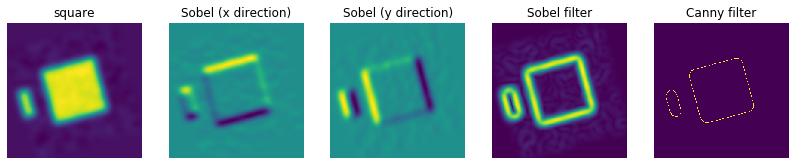

In [36]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

from PIL import Image, ImageOps
import numpy as np
from PIL import Image
from scipy import ndimage
%matplotlib inline


# first with synthetic data
img = np.zeros((256, 256)) # this function takes a tuple for shape
img[64:-64, 64:-64] = 1 # make a big square
img[96:-96, 0:25] = 1 # make a small rectangle

# add some random noise
noise = np.random.randn(img.shape[0], img.shape[1]) / 2# this function does not
img += noise

img = ndimage.rotate(img, 15, mode='constant')
img = ndimage.gaussian_filter(img, 8)

sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)

from scipy import ndimage

from skimage.feature import canny
canny_edges = canny(img, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(img)
ax1.set_axis_off()
ax1.set_title("square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")



It's clear that canny filter has better performance than Sobel filter, because of non-maxium compression strategy in Canny.

To make comparison, this time we do not perform any filtering method to see the performance of these edge detection methods.

Text(0.5, 1.0, 'Canny filter')

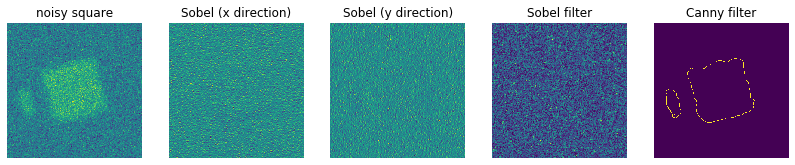

In [37]:
#Turn up the noise!

# Add MORE noise (we don't Gaussian blur it out this time)
noise = np.random.randn(img.shape[0], img.shape[1]) / 2
img += noise

sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)
canny_edges = canny(img, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(img)
ax1.set_axis_off()
ax1.set_title("noisy square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")



The result is much opaque and unclear compared with the former. Thus, it proves the significance for the filtering phase.